# ELG 5255 Applied Machine Learning Summer 2021
# Term Project
---
##**By Group 31 :**
*   Abdelrahman Othman     [aothm031@uOttawa.ca](aothm031@uOttawa.ca)
*   Heba Hassan            [hhass021@uOttawa.ca](hhass021@uOttawa.ca)
*   Aliaa Ahmed            [aahme256@uOttawa.ca](aahme256@uottawa.ca)
---

In [ ]:
#We use the last update of matplotlib
!pip install --upgrade matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Final_ML_Data/pendigits-tra.csv",header=None)
test = pd.read_csv("/content/drive/MyDrive/Final_ML_Data/pendigits-tes.csv",header=None)

In [ ]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [ ]:
X_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

In [ ]:
# Normalize the data
X_train = X_train / 100
X_test = X_test /100

# Q1

Apply three following methods on the provided dataset to obtain base line preformance. 

1. Decision Tree
2. SVM
3. Gradient Boost


In [ ]:
#to store baseline accuracies
baseline=[]

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
ds_score = ds.score(X_test,y_test)
baseline.append(('Q1','DT',ds_score))

## SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto').fit(X_train,y_train)
svc_score = svc.score(X_test,y_test)
baseline.append(('Q1','SVM',svc_score))

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier().fit(X_train, y_train)
gb_score = gb.score(X_test,y_test)
baseline.append(('Q1','GB',gb_score))

## Plot

In [ ]:
baseline_df = pd.DataFrame(baseline,columns=['Question','Model','Accuracy']).sort_values(by=['Accuracy'])
baseline_df['Accuracy']= baseline_df['Accuracy'].apply(lambda x: round(x,2))

In [ ]:
baseline_df

,Question,Model,Accuracy
0,Q1,DT,0.92
1,Q1,SVM,0.94
2,Q1,GB,0.96


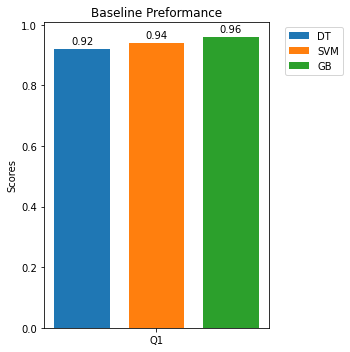

In [ ]:
labels = ['Q1']
width = 0.35  # the width of the bars

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(5,5))
rects1 = ax.bar(x - width/3, baseline_df.Accuracy[baseline_df['Model']=='DT'], width/4, label='DT')
rects2 = ax.bar(x , baseline_df.Accuracy[baseline_df['Model']=='SVM'], width/4, label='SVM')
rects3 = ax.bar(x + width/3, baseline_df.Accuracy[baseline_df['Model']=='GB'], width/4, label='GB')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Baseline Preformance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

# Q2

## Chi-Squared

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

kBest5 = SelectKBest(chi2, k=5).fit(X_train, y_train)
X_train_5 = kBest5.transform(X_train)
X_test_5 = kBest5.transform(X_test)

In [ ]:
kBest7 = SelectKBest(chi2, k=7).fit(X_train, y_train)
X_train_7 = kBest7.transform(X_train)
X_test_7 = kBest7.transform(X_test)

In [ ]:
kBest10 = SelectKBest(chi2, k=10).fit(X_train, y_train)
X_train_10 = kBest10.transform(X_train)
X_test_10 = kBest10.transform(X_test)

### Decision Tree

In [ ]:
DT_ac = []

In [ ]:
ds_5 = DecisionTreeClassifier(random_state=0).fit(X_train_5,y_train)
ds_score_5 = ds_5.score(X_test_5,y_test)
DT_ac.append((5,ds_score_5))

In [ ]:
ds_7 = DecisionTreeClassifier(random_state=0).fit(X_train_7,y_train)
ds_score_7 = ds_7.score(X_test_7,y_test)
DT_ac.append((7,ds_score_7))

In [ ]:
ds_10 = DecisionTreeClassifier(random_state=0).fit(X_train_10,y_train)
ds_score_10 = ds_10.score(X_test_10,y_test)
DT_ac.append((10,ds_score_10))

In [ ]:
DT_ac_df = pd.DataFrame(DT_ac,columns=['Feature Number','Accuracy'])
DT_ac_df

,Feature Number,Accuracy
0,5,0.785592
1,7,0.875357
2,10,0.895941


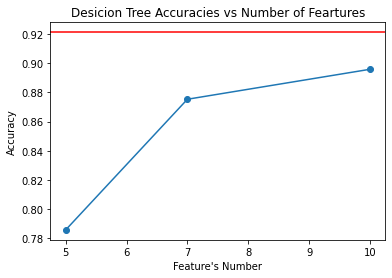

In [ ]:
plt.scatter(DT_ac_df['Feature Number'], DT_ac_df['Accuracy'])
plt.plot(DT_ac_df['Feature Number'], DT_ac_df['Accuracy'])
plt.axhline(y=ds_score, color='r', linestyle='-')
plt.xlabel('Feature\'s Number')
plt.ylabel('Accuracy')
plt.title('Desicion Tree Accuracies vs Number of Feartures')
plt.show()

### SVM

In [ ]:
SVM_ac = []

In [ ]:
svc_5 = SVC(gamma='auto').fit(X_train_5,y_train)
svc_score_5 = svc_5.score(X_test_5,y_test)
SVM_ac.append((5,svc_score_5))

In [ ]:
svc_7 = SVC(gamma='auto').fit(X_train_7,y_train)
svc_score_7 = svc_7.score(X_test_7,y_test)
SVM_ac.append((7,svc_score_7))

In [ ]:
svc_10 = SVC(gamma='auto').fit(X_train_10,y_train)
svc_score_10 = svc_10.score(X_test_10,y_test)
SVM_ac.append((10,svc_score_10))

In [ ]:
SVM_ac_df = pd.DataFrame(SVM_ac,columns=['Feature Number','Accuracy'])
SVM_ac_df

,Feature Number,Accuracy
0,5,0.785306
1,7,0.871355
2,10,0.903087


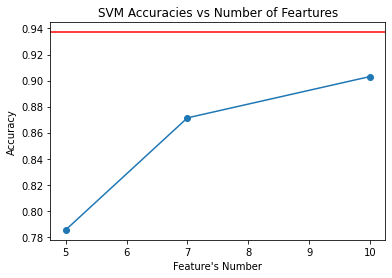

In [ ]:
plt.scatter(SVM_ac_df['Feature Number'], SVM_ac_df['Accuracy'])
plt.plot(SVM_ac_df['Feature Number'], SVM_ac_df['Accuracy'])
plt.axhline(y=svc_score, color='r', linestyle='-')
plt.xlabel('Feature\'s Number')
plt.ylabel('Accuracy')
plt.title('SVM Accuracies vs Number of Feartures')
plt.show()

## Gradient Boost

In [ ]:
gb_ac = []

In [ ]:
gb_5 = GradientBoostingClassifier().fit(X_train_5, y_train)
gb_score_5 = gb_5.score(X_test_5,y_test)
gb_ac.append((5,gb_score_5))

In [ ]:
gb_7 = GradientBoostingClassifier().fit(X_train_7, y_train)
gb_score_7 = gb_7.score(X_test_7,y_test)
gb_ac.append((7,gb_score_7))

In [ ]:
gb_10 = GradientBoostingClassifier().fit(X_train_10, y_train)
gb_score_10 = gb_10.score(X_test_10,y_test)
gb_ac.append((10,gb_score_10))

In [ ]:
gb_ac_df = pd.DataFrame(gb_ac,columns=['Feature Number','Accuracy'])
gb_ac_df

,Feature Number,Accuracy
0,5,0.828759
1,7,0.908519
2,10,0.937393


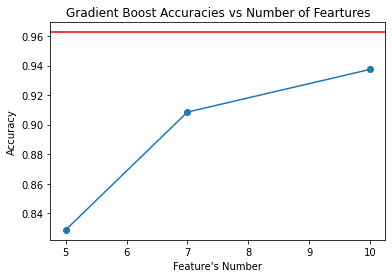

In [ ]:
plt.scatter(gb_ac_df['Feature Number'], gb_ac_df['Accuracy'])
plt.plot(gb_ac_df['Feature Number'], gb_ac_df['Accuracy'])
plt.axhline(y=gb_score, color='r', linestyle='-')
plt.xlabel('Feature\'s Number')
plt.ylabel('Accuracy')
plt.title('Gradient Boost Accuracies vs Number of Feartures')
plt.show()

## PLot t-SNE

In [ ]:
 from sklearn.manifold import TSNE

X_embedded_befor_train = TSNE(n_components=2, random_state=0).fit_transform(X_train)
X_embedded_befor_test = TSNE(n_components=2, random_state=0).fit_transform(X_test)

X_embedded_5_train = TSNE(n_components=2, random_state=0).fit_transform(X_train_5)
X_embedded_5_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_5)

X_embedded_7_train = TSNE(n_components=2, random_state=0).fit_transform(X_train_7)
X_embedded_7_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_7)

X_embedded_10_train = TSNE(n_components=2, random_state=0).fit_transform(X_train_10)
X_embedded_10_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_10)

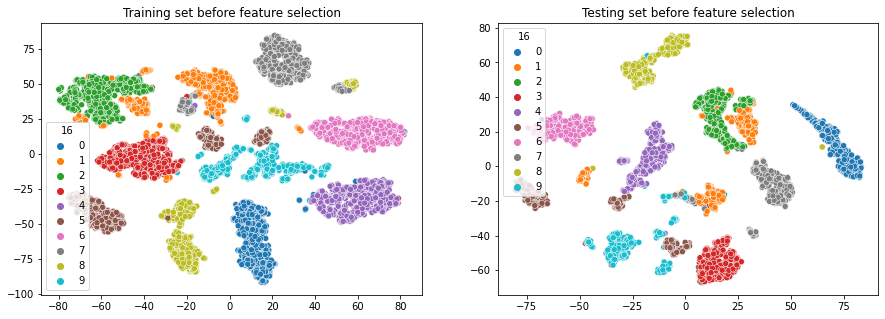

In [ ]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x=X_embedded_befor_train[:,0], y=X_embedded_befor_train[:,1], hue=y_train ,ax=axs[0],palette="tab10")
axs[0].set_title('Training set before feature selection')
sns.scatterplot(x=X_embedded_befor_test[:,0], y=X_embedded_befor_test[:,1], hue=y_test,ax=axs[1],palette="tab10" )
axs[1].set_title('Testing set before feature selection')
plt.show()

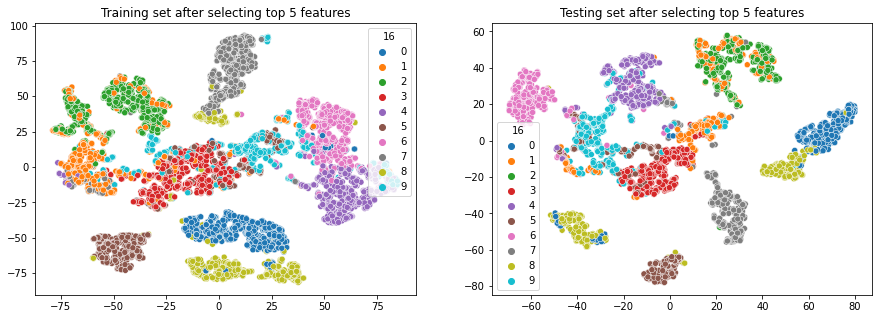

In [ ]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x=X_embedded_5_train[:,0], y=X_embedded_5_train[:,1], hue=y_train ,ax=axs[0],palette="tab10")
axs[0].set_title('Training set after selecting top 5 features')
sns.scatterplot(x=X_embedded_5_test[:,0], y=X_embedded_5_test[:,1], hue=y_test ,ax=axs[1],palette="tab10")
axs[1].set_title('Testing set after selecting top 5 features')
plt.show()

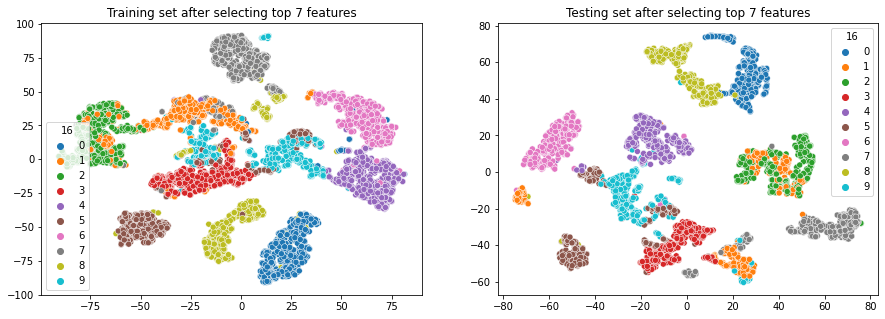

In [ ]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x=X_embedded_7_train[:,0], y=X_embedded_7_train[:,1], hue=y_train ,ax=axs[0],palette="tab10")
axs[0].set_title('Training set after selecting top 7 features')
sns.scatterplot(x=X_embedded_7_test[:,0], y=X_embedded_7_test[:,1], hue=y_test ,ax=axs[1],palette="tab10")
axs[1].set_title('Testing set after selecting top 7 features')
plt.show()

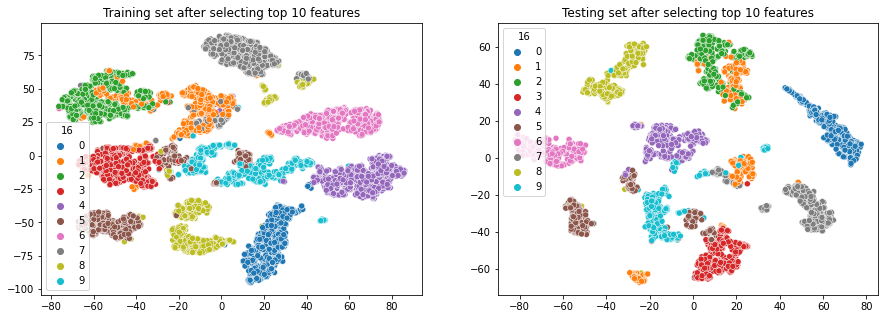

In [ ]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x=X_embedded_10_train[:,0], y=X_embedded_10_train[:,1], hue=y_train ,ax=axs[0],palette="tab10")
axs[0].set_title('Training set after selecting top 10 features')
sns.scatterplot(x=X_embedded_10_test[:,0], y=X_embedded_10_test[:,1], hue=y_test ,ax=axs[1],palette="tab10")
axs[1].set_title('Testing set after selecting top 10 features')
plt.show()

In [ ]:
baseline.append(('Q2','DT',ds_score))
baseline.append(('Q2','SVM',svc_score))
baseline.append(('Q2','GB',gb_score))

# Q3

## Decision Tree

### First param

In [ ]:
dt_ac=[]

max_depths = [5,10,15,20]
for max_depth in max_depths:
  score = DecisionTreeClassifier(random_state=0,max_depth=max_depth).fit(X_train,y_train).score(X_test,y_test)
  dt_ac.append((max_depth,score))

In [ ]:
dt_ac_df = pd.DataFrame(dt_ac,columns=['Max Depth','Accuracy'])
dt_ac_df

,Max Depth,Accuracy
0,5,0.763579
1,10,0.907376
2,15,0.920526
3,20,0.921384


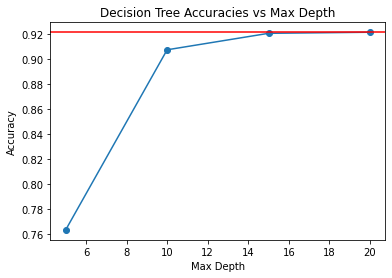

In [ ]:
plt.scatter(dt_ac_df['Max Depth'], dt_ac_df['Accuracy'])
plt.plot(dt_ac_df['Max Depth'], dt_ac_df['Accuracy'])
plt.axhline(y=ds_score, color='r', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracies vs Max Depth')
plt.show()

### Second param

In [ ]:
dt_ac=[]

min_samples_leafs = [2,3,4,5]
for min_samples_leaf in min_samples_leafs:
  score = DecisionTreeClassifier(random_state=0,min_samples_leaf=min_samples_leaf).fit(X_train,y_train).score(X_test,y_test)
  dt_ac.append((min_samples_leaf,score))

In [ ]:
dt_ac_df = pd.DataFrame(dt_ac,columns=['Min Samples Leaf','Accuracy'])
dt_ac_df

,Min Samples Leaf,Accuracy
0,2,0.913951
1,3,0.915094
2,4,0.909377
3,5,0.902230


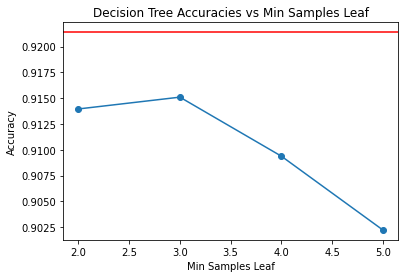

In [ ]:
plt.scatter(dt_ac_df['Min Samples Leaf'], dt_ac_df['Accuracy'])
plt.plot(dt_ac_df['Min Samples Leaf'], dt_ac_df['Accuracy'])
plt.axhline(y=ds_score, color='r', linestyle='-')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracies vs Min Samples Leaf')
plt.show()

## SVM

### First param

In [ ]:
svc_ac=[]

kernels=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
  score = SVC(random_state=0,kernel=kernel).fit(X_train,y_train).score(X_test,y_test)
  svc_ac.append((kernel,score))

In [ ]:
svc_ac_df = pd.DataFrame(svc_ac,columns=['Kernel','Accuracy'])
svc_ac_df

,Kernel,Accuracy
0,linear,0.949400
1,poly,0.978559
2,rbf,0.981704
3,sigmoid,0.383362


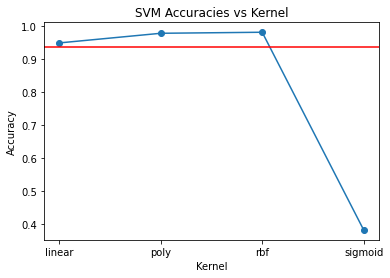

In [ ]:
plt.scatter(svc_ac_df['Kernel'].astype(str), svc_ac_df['Accuracy'])
plt.plot(svc_ac_df['Kernel'].astype(str), svc_ac_df['Accuracy'])
plt.axhline(y=svc_score, color='r', linestyle='-')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Accuracies vs Kernel')
plt.show()

In [ ]:
#update svc score baseline
svc_score = svc_ac_df['Accuracy'].max()
svc_score

0.9817038307604345

### Second param

In [ ]:
svc_ac=[]

cs=[2, 2.1, 2.5, 3]
for c in cs:
  score = SVC(random_state=0,kernel= 'rbf' ,C=c).fit(X_train,y_train).score(X_test,y_test)
  svc_ac.append((c,score))

In [ ]:
svc_ac_df = pd.DataFrame(svc_ac,columns=['C','Accuracy'])
svc_ac_df

,C,Accuracy
0,2.0,0.982847
1,2.1,0.983419
2,2.5,0.983133
3,3.0,0.983419


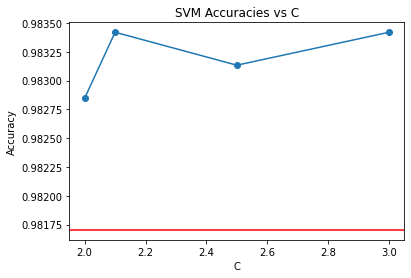

In [ ]:
plt.scatter(svc_ac_df['C'], svc_ac_df['Accuracy'])
plt.plot(svc_ac_df['C'], svc_ac_df['Accuracy'])
plt.axhline(y=svc_score, color='r', linestyle='-')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('SVM Accuracies vs C')
plt.show()

In [ ]:
#update svc score baseline
svc_score = svc_ac_df['Accuracy'].max()
svc_score

0.9834190966266438

## Gradient Boost

### First param

In [ ]:
gb_ac=[]

learning_rates=[0.1, 0.2, 0.3, 0.4]
for learning_rate in learning_rates:
  score = GradientBoostingClassifier(random_state=0,learning_rate=learning_rate).fit(X_train,y_train).score(X_test,y_test)
  gb_ac.append((learning_rate,score))

In [ ]:
gb_ac_df = pd.DataFrame(gb_ac,columns=['Learning Rate','Accuracy'])
gb_ac_df

,Learning Rate,Accuracy
0,0.1,0.962550
1,0.2,0.946255
2,0.3,0.965981
3,0.4,0.636650


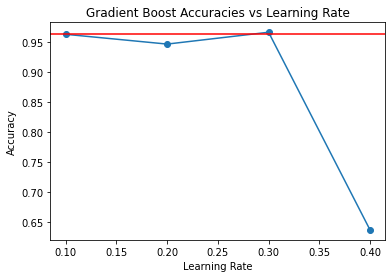

In [ ]:
plt.scatter(gb_ac_df['Learning Rate'], gb_ac_df['Accuracy'])
plt.plot(gb_ac_df['Learning Rate'], gb_ac_df['Accuracy'])
plt.axhline(y=gb_score, color='r', linestyle='-')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Gradient Boost Accuracies vs Learning Rate')
plt.show()

In [ ]:
#update svc score baseline
gb_score = gb_ac_df['Accuracy'].max()
gb_score

0.965980560320183

### Second param

In [ ]:
gb_ac=[]

n_estimatorss=[100, 200, 300, 400]
for n_estimators in n_estimatorss:
  score = GradientBoostingClassifier(random_state=0,learning_rate=0.3,n_estimators=n_estimators).fit(X_train,y_train).score(X_test,y_test)
  gb_ac.append((n_estimators,score))

In [ ]:
gb_ac_df = pd.DataFrame(gb_ac,columns=['N estimators','Accuracy'])
gb_ac_df

,N estimators,Accuracy
0,100,0.965981
1,200,0.965981
2,300,0.965981
3,400,0.965981


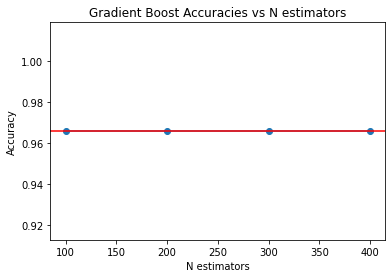

In [ ]:
plt.scatter(gb_ac_df['N estimators'], gb_ac_df['Accuracy'])
plt.plot(gb_ac_df['N estimators'], gb_ac_df['Accuracy'])
plt.axhline(y=gb_score, color='r', linestyle='-')
plt.xlabel('N estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boost Accuracies vs N estimators')
plt.show()

In [ ]:
baseline.append(('Q3','DT',ds_score))
baseline.append(('Q3','SVM',svc_score))
baseline.append(('Q3','GB',gb_score))

# Q4 

### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
              ('DT',DecisionTreeClassifier(random_state=0)),
              ('svc',SVC(random_state=0,kernel= 'rbf' ,C=3)),
              ('GB',GradientBoostingClassifier(random_state=0,learning_rate=0.3))       
              ]

stacking = StackingClassifier(estimators=estimators)
Stacking = stacking.fit(X_train, y_train).score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
Stacking

0.9791309319611207

In [ ]:
from sklearn.linear_model import LogisticRegression

estimators = [
              ('DT',DecisionTreeClassifier(random_state=0)),
              ('svc',SVC(random_state=0,kernel= 'rbf' ,C=3)),
              ('GB',GradientBoostingClassifier(random_state=0,learning_rate=0.3))       
              ]

stacking_m = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=0,max_iter=400,n_jobs=-1))
Stacking = stacking_m.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
Stacking

0.9802744425385935

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ensemble = RandomForestClassifier(random_state=0)
RF = ensemble.fit(X_train, y_train).score(X_test, y_test)

In [ ]:
baseline.append(('Q4','Stacking',Stacking))
baseline.append(('Q4','RF',RF))

### PLot

In [ ]:
baseline_df = pd.DataFrame(baseline,columns=['Question','Model','Accuracy']).sort_values(by=['Accuracy'])

In [ ]:
baseline_df['Accuracy']= pd.to_numeric(baseline_df['Accuracy']).apply(lambda x: round(x,2))

In [ ]:
baseline_df.sort_index(inplace=True)

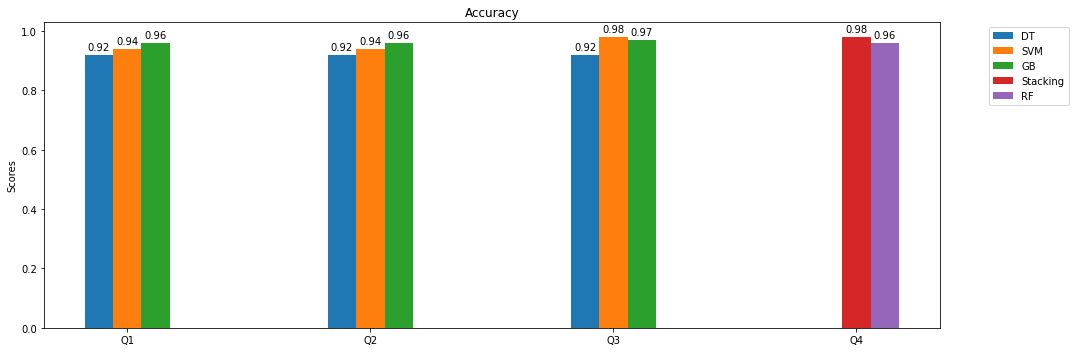

In [ ]:
labels = ['Q1','Q2','Q3','Q4']
width = .35 # the width of the bars

x = np.arange(len(labels)-1)  # the label locations

fig, ax = plt.subplots(figsize=(15,5))

rects1 = ax.bar(x - width/3, baseline_df.Accuracy[baseline_df['Model']=='DT'].values, width/3, label='DT')
rects2 = ax.bar(x , baseline_df.Accuracy[baseline_df['Model']=='SVM'].values, width/3, label='SVM')
rects3 = ax.bar(x + width/3, baseline_df.Accuracy[baseline_df['Model']=='GB'].values, width/3, label='GB')

rects4 = ax.bar(3 , baseline_df.Accuracy[baseline_df['Model']=='Stacking'], width/3, label='Stacking')
rects5 = ax.bar(3 + width/3, baseline_df.Accuracy[baseline_df['Model']=='RF'], width/3, label='RF')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
ax.bar_label(rects5, padding=3)


fig.tight_layout()

plt.show()

In [ ]:
svc = SVC(random_state=0,kernel= 'rbf' ,C=3).fit(X_train,y_train)
svc_score = svc.score(X_test,y_test)
svc_score

0.9834190966266438

## Plotting Confusion Matrix

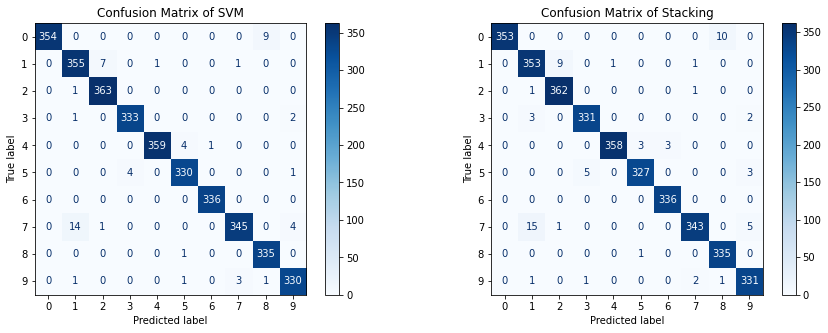

In [85]:
from sklearn.metrics import plot_confusion_matrix
fig, axs = plt.subplots(1, 2,figsize=(15,5))

plot_confusion_matrix(svc, X_test, y_test,ax=axs[0],values_format = '.0f',cmap=plt.cm.Blues)
axs[0].set_title('Confusion Matrix of SVM')

plot_confusion_matrix(stacking_m, X_test, y_test,ax=axs[1],values_format = '.0f',cmap=plt.cm.Blues)  
axs[1].set_title('Confusion Matrix of Stacking')

plt.show() 

Normalized Confusion Matrix

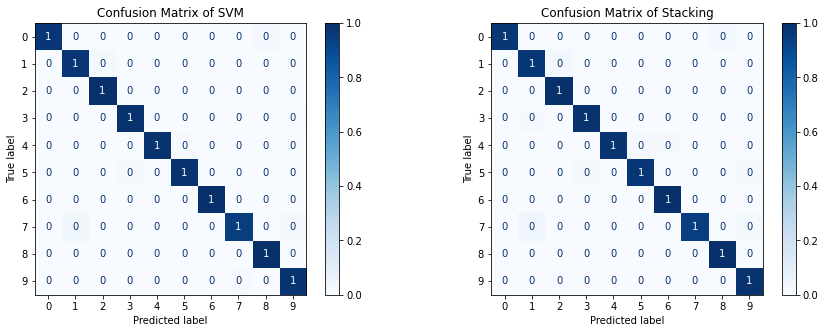

In [86]:
fig, axs = plt.subplots(1, 2,figsize=(15,5))

plot_confusion_matrix(svc, X_test, y_test,ax=axs[0],values_format = '.0f',cmap=plt.cm.Blues,normalize='true')
axs[0].set_title('Confusion Matrix of SVM')

plot_confusion_matrix(stacking_m, X_test, y_test,ax=axs[1],values_format = '.0f',cmap=plt.cm.Blues,normalize='true')  
axs[1].set_title('Confusion Matrix of Stacking')

plt.show() 